In [34]:
# Prepare the Data
# Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames into a single DataFrame.

# Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.

# Display the updated number of unique mice IDs.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [36]:
cd '/Users/jnellniz/Desktop/Module 5/Module 5 Assignment/Starter_Code/Pymaceuticals/data'

/Users/jnellniz/Desktop/Module 5/Module 5 Assignment/Starter_Code/Pymaceuticals/data


In [37]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [173]:
metadata_df = pd.DataFrame(mouse_metadata, columns=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)"])
metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [174]:
study_results_df = pd.DataFrame(study_results, columns=['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [175]:
combined_df = pd.merge(study_results_df, metadata_df,
                                 how='outer', on='Mouse ID')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [166]:
clean_df = combined_df.dropna()
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [154]:
# # Checking the number of mice.
# mice_count = len(clean_df)
# mice_count

In [156]:
# clean_metadata = mouse_metadata.dropna()
# clean_metadata.head()

In [169]:
# clean_metadata.count()

In [180]:
mice_count = len(clean_metadata)
mice_count

249

In [159]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# clean_metadata['Mouse ID'].unique()

In [171]:
# duplicates = mouse_metadata.duplicated('Mouse ID')

# duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [168]:
mice_count = len(clean_metadata)
mice_count

249

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = pd.DataFrame(study_results, columns=["Tumor Volume (mm3)"])

tumor_volume.describe()


,Tumor Volume (mm3)
count,1893.000000
mean,50.448381
std,8.894722
min,22.050126
25%,45.000000
50%,48.951474
75%,56.292200
max,78.567014


In [55]:
# Variance

variance = study_results_df['Tumor Volume (mm3)'].var()
variance

79.1160740071663

In [56]:
# SEM

sem = study_results_df['Tumor Volume (mm3)'].sem()
sem

0.20443585034961514

In [57]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



# Group the DataFrame by the 'Drug Regimen' column using the groupby() function.

# Apply the necessary summary statistical methods 
# (mean(), median(), var(), std(), sem()) 
# to calculate the desired properties of the 'Tumor Volume (mm3)' column within each drug regimen group.

# Combine the calculated statistics into a new DataFrame using the pd.DataFrame() function, 
#where the index is the unique drug regimens and the columns represent the calculated properties.

In [58]:
# # Group the DataFrame by 'Group' column
# grouped = df.groupby('Group')

# # Calculate the sum of 'Value' column for each group
# sum_by_group = grouped['Value'].sum()

# # Print the sum by group
# print(sum_by_group)

In [59]:
volume = pd.DataFrame(study_results_df, columns=['Tumor Volume (mm3)'])
volume

,Tumor Volume (mm3)
0,45.000000
1,45.000000
2,45.000000
3,45.000000
4,45.000000
...,...
1888,41.581521
1889,31.023923
1890,61.433892
1891,58.634971


In [60]:
regimen = pd.DataFrame(mouse_metadata, columns=['Drug Regimen'])
regimen

,Drug Regimen
0,Ramicane
1,Capomulin
2,Capomulin
3,Capomulin
4,Ramicane
...,...
244,Stelasyn
245,Propriva
246,Infubinol
247,Naftisol


In [65]:
regimen_and_volumn = pd.DataFrame(merged_df, columns=['Drug Regimen', 'Tumor Volume (mm3)'])
regimen_and_volumn.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [82]:
grouped = merged_df.groupby(['Drug Regimen', 'Tumor Volume (mm3)'])
grouped.size()            

Drug Regimen  Tumor Volume (mm3)
Capomulin     23.343598             1
              25.472143             1
              28.167397             1
              28.328531             1
              28.430964             1
                                   ..
Zoniferol     68.498639             1
              68.611061             1
              70.827796             1
              71.108118             1
              73.324432             1
Length: 1653, dtype: int64

In [83]:
grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
merged_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [88]:
summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


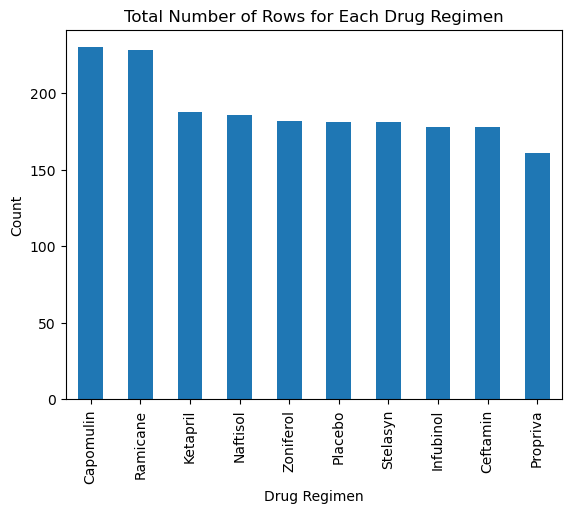

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

merged_df['Drug Regimen'].value_counts().plot(kind='bar')

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

plt.show()

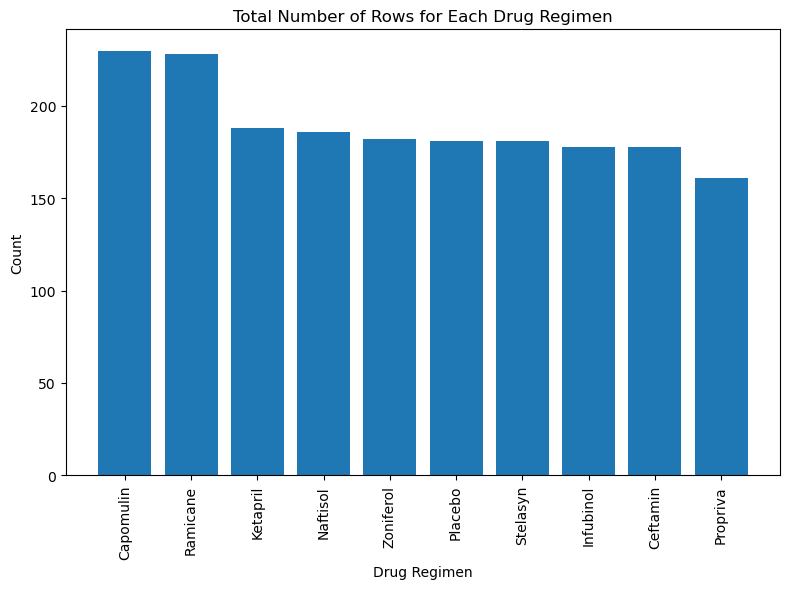

In [92]:
drug_counts = merged_df['Drug Regimen'].value_counts()

plt.figure(figsize=(8, 6))

plt.bar(drug_counts.index, drug_counts.values)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

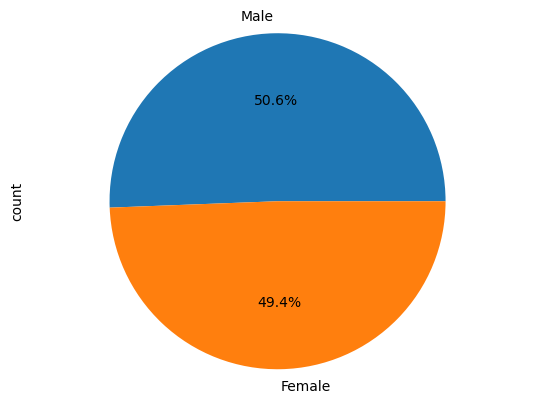

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = merged_df['Sex'].value_counts()

sex_distribution.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')

plt.show()

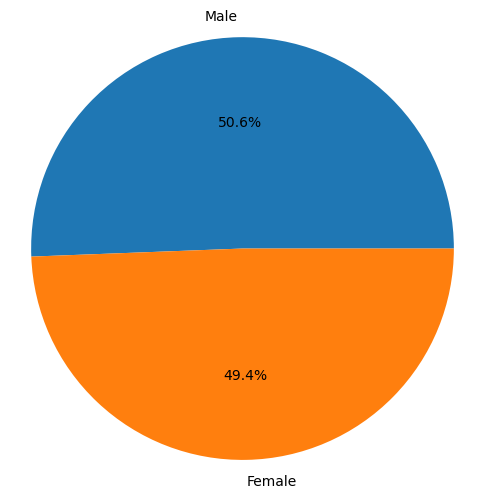

In [96]:
sex_distribution = merged_df['Sex'].value_counts()

# Set the figure size
plt.figure(figsize=(6, 6))

# Generate the pie plot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')

# Set equal aspect ratio to ensure the pie is circular
plt.axis('equal')

# Display the plot
plt.show()

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint_max = merged_df.groupby('Mouse ID')['Timepoint'].max()

max_df = pd.DataFrame(timepoint_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_volumn_df = pd.merge(merged_df, timepoint_max, on=['Mouse ID', 'Timepoint'], how='inner')

final_volumn_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [101]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for treatment in treatments:
   
    tumor_volumes = final_volumn_df.loc[final_volumn_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR for the current treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using the upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [116]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(8, 6))

final_volumn_df.boxplot(column='Tumor Volume (mm3)', by= 'drug_counts')

# Set plot title and axis labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.tight_layout()
plt.show()

KeyError: 'drug_counts'

<Figure size 800x600 with 0 Axes>

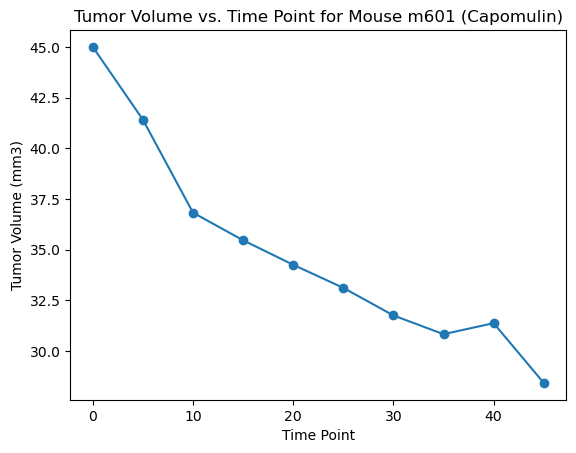

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'm601'
treatment = 'Capomulin'

# Filter the DataFrame for the specific mouse and treatment regimen
mouse_data = merged_df.loc[(merged_df['Mouse ID'] == mouse_id) & (merged_df['Drug Regimen'] == treatment)]

# Generate the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Set plot title and axis labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

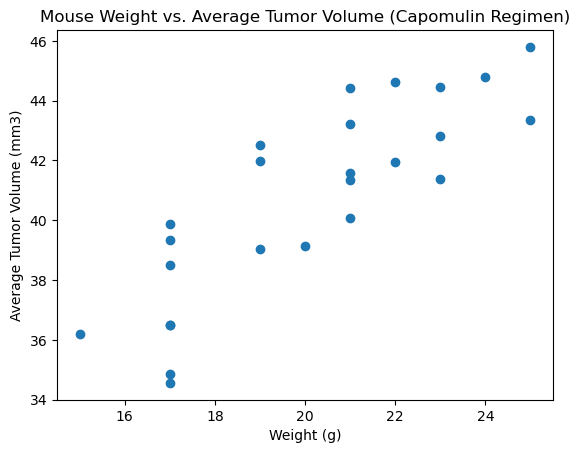

In [120]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Generate the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

In [ ]:
from scipy.stats import pearsonr, linregress
from scipy import stats
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(year, petrol_electric_cars)

In [ ]:
 # Create equation of line to calculate predicted number of petrol-electric cars
pe_fit = pe_slope * year + pe_int

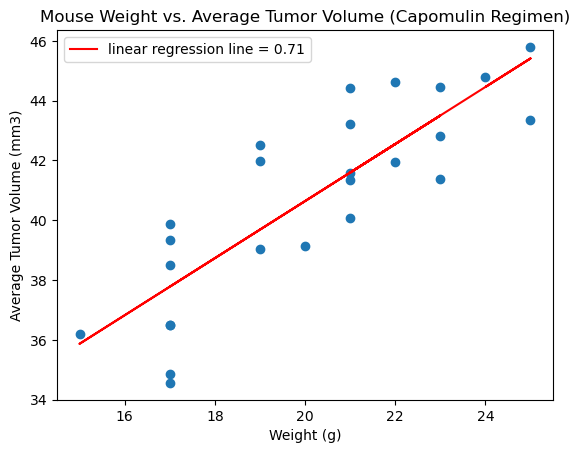

In [144]:
from scipy.stats import pearsonr, linregress
from scipy import stats

capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0]

# Generate the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
line = slope * merged_data['Weight (g)'] + intercept

# Plot the linear regression line
plt.plot(merged_data['Weight (g)'], line, color='red', label=f"linear regression line = {r_value**2:.2f}")

# Display the plot
plt.legend()
plt.show()